In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures,StandardScaler


In [81]:
df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [83]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [84]:
df.drop('Car_Name',axis=1,inplace=True)

In [85]:
df['Age'] = 2023 - df['Year']
print(df['Age'])

0       9
1      10
2       6
3      12
4       9
       ..
296     7
297     8
298    14
299     6
300     7
Name: Age, Length: 301, dtype: int64


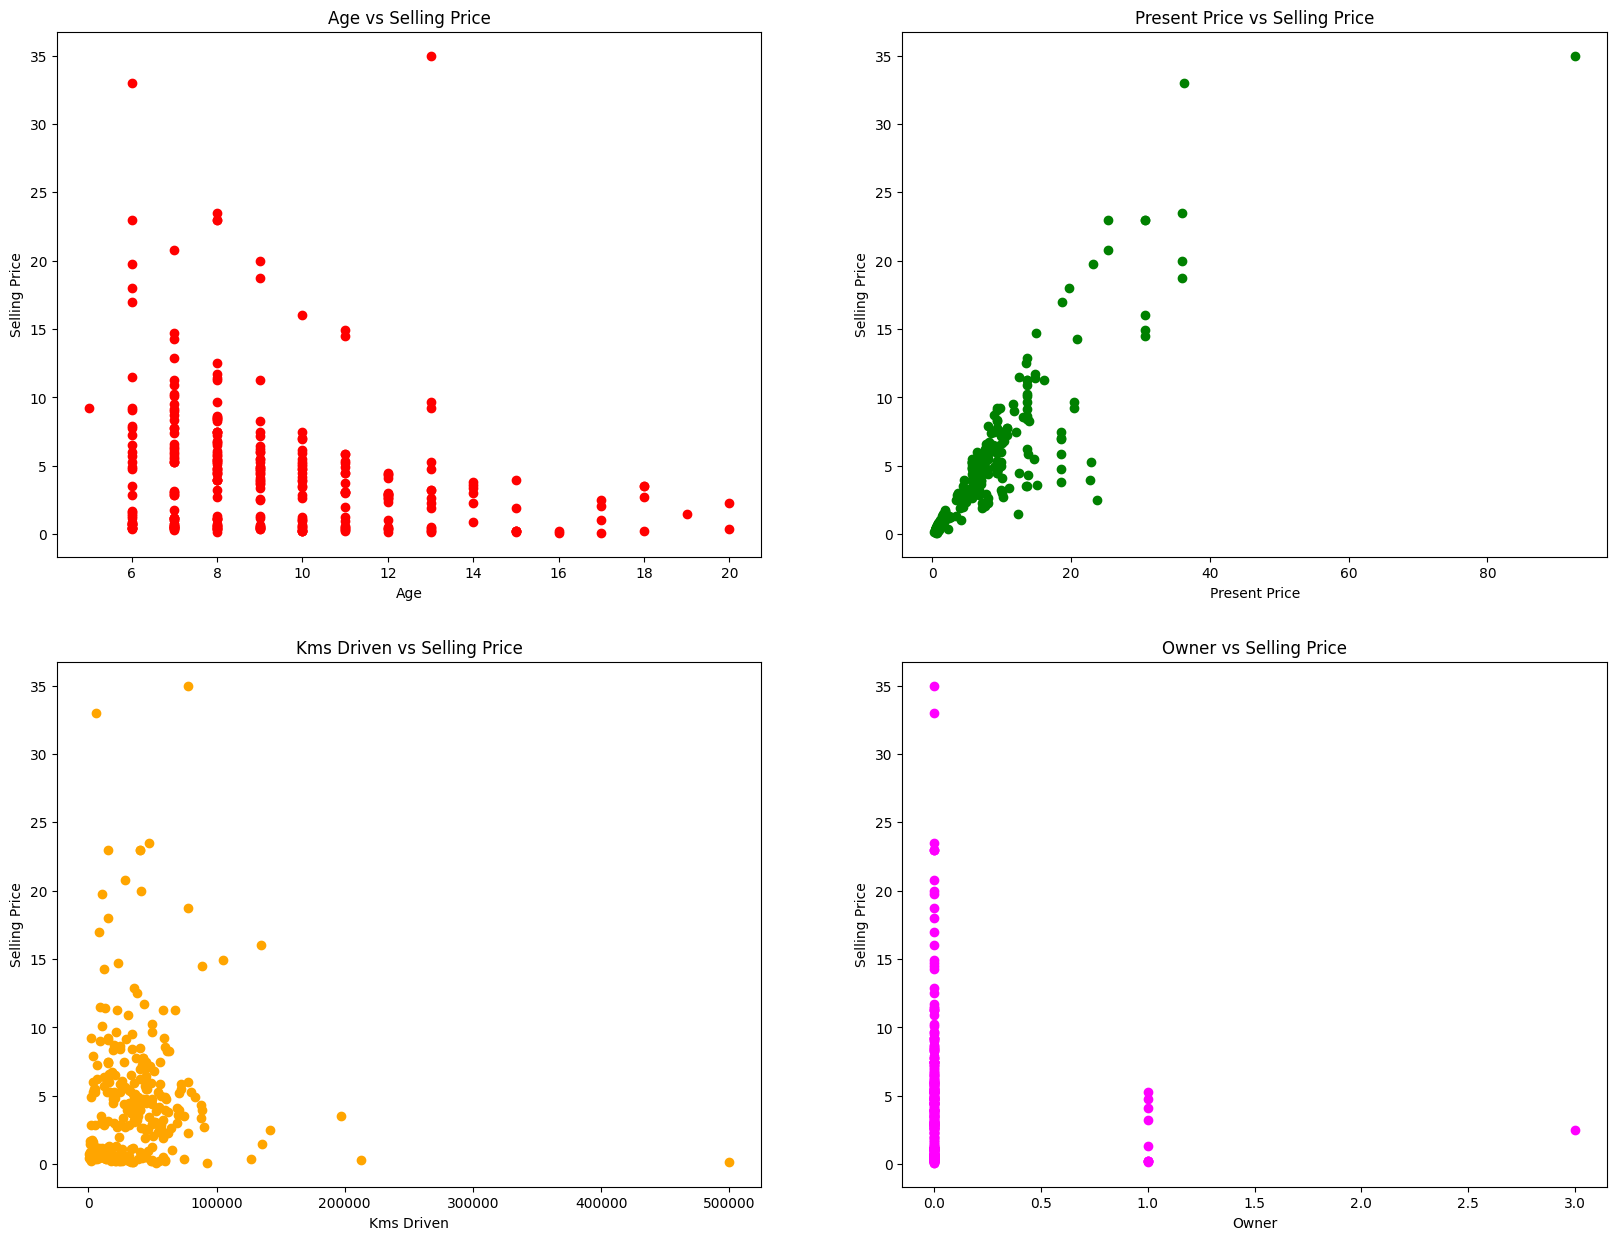

In [86]:
fig=plt.figure(figsize=(20,15))
fs=mpl.gridspec.GridSpec(2,2)
ax0=fig.add_subplot(fs[0:1,0:1])
ax0.set_title("Age vs Selling Price")
plt.xlabel("Age")
plt.ylabel("Selling Price")
ax0.scatter(df['Age'],df['Selling_Price'],c='red')

ax1=fig.add_subplot(fs[0:1,1:])
ax1.set_title("Present Price vs Selling Price")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
ax1.scatter(df['Present_Price'],df['Selling_Price'],color='green')

ax2=fig.add_subplot(fs[1:2,0:1])
ax2.set_title("Kms Driven vs Selling Price")
plt.xlabel("Kms Driven")
plt.ylabel("Selling Price")
ax2.scatter(df['Kms_Driven'],df['Selling_Price'],c='orange')

ax3=fig.add_subplot(fs[1:2,1:])
ax3.set_title("Owner vs Selling Price")
plt.xlabel("Owner")
plt.ylabel("Selling Price")
ax3.scatter(df['Owner'],df['Selling_Price'],c='magenta')

In [87]:
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = label_encoder.fit_transform(df['Seller_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Owner'] = label_encoder.fit_transform(df['Owner'])

In [123]:
condition = (df["Selling_Price"] > 30) | (df["Kms_Driven"] > 300000)
df = df[~condition]

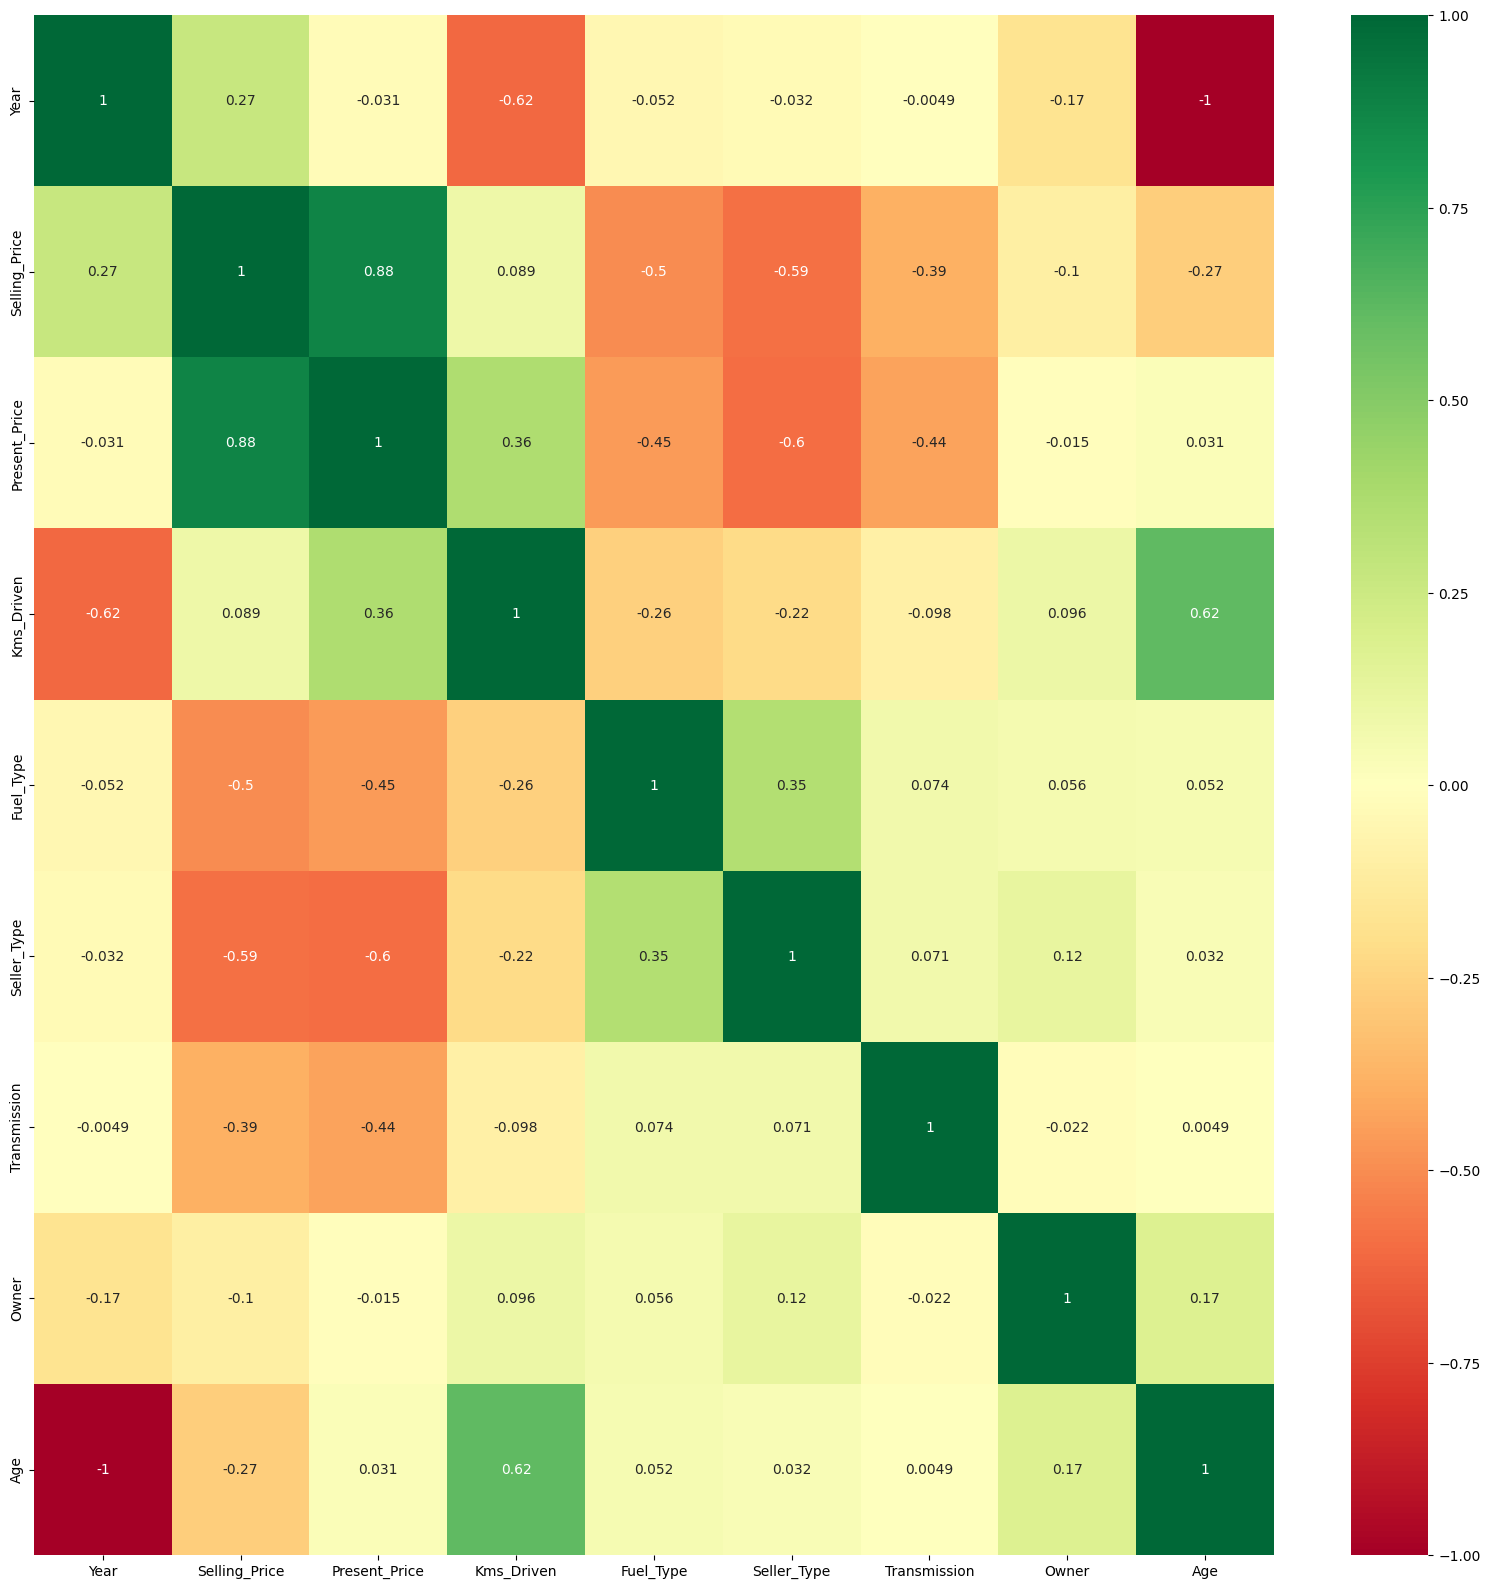

In [112]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

#plot heatmap
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [113]:
X = df.drop(['Selling_Price', 'Owner'], axis=1)
y = df['Selling_Price']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [115]:
# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model on the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = regressor.predict(X_test)

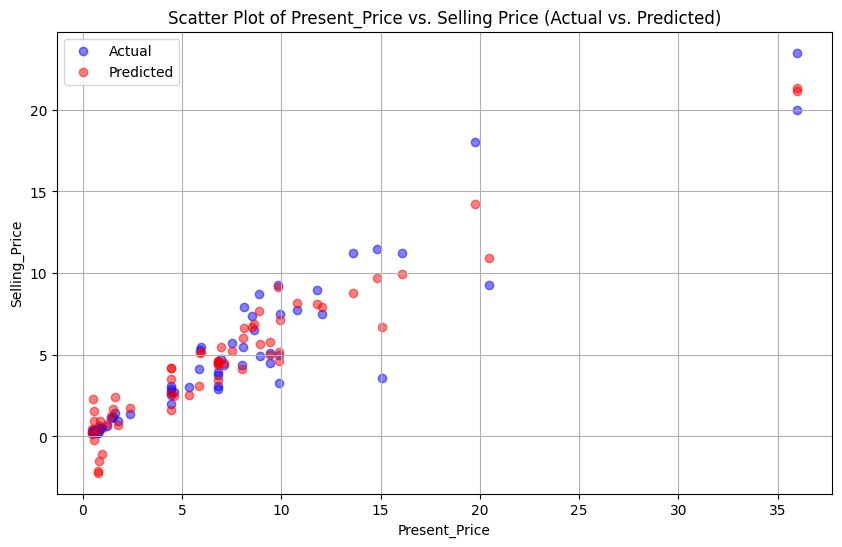

In [117]:
# Create a scatter plot for X_test vs. Selling_Price (Actual and Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Present_Price'], y_test, alpha=0.5, label='Actual', c='blue')
plt.scatter(X_test['Present_Price'], y_pred, alpha=0.5, label='Predicted', c='red')
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.title("Scatter Plot of Present_Price vs. Selling Price (Actual vs. Predicted)")
plt.legend()
plt.grid(True)
plt.show()

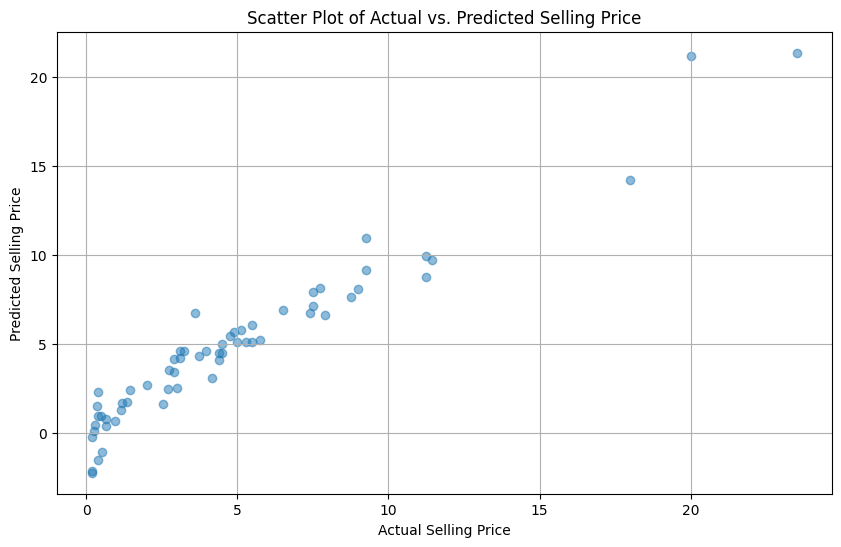

In [118]:
#comparing the range of predict and actual data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Scatter Plot of Actual vs. Predicted Selling Price")
plt.grid()
plt.show()

In [119]:
#Evaluating the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1.4535300079290416
Root Mean Squared Error (RMSE): 1.2056243228838084
R-squared (R2): 0.9359537844365099


In [97]:
compare = pd.DataFrame({'Actual': y_test.values, 'Predict': y_pred})

compare

,Actual,Predict
0,8.25,7.197224
1,0.50,-0.525620
2,5.25,4.318513
3,9.50,8.710531
4,18.00,14.150766
...,...,...
56,0.65,0.214779
57,2.55,1.961197
58,4.15,3.409042
59,1.35,1.773110


In [98]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,2,0,1,0,9
1,2013,4.75,9.54,43000,1,0,1,0,10
2,2017,7.25,9.85,6900,2,0,1,0,6
3,2011,2.85,4.15,5200,2,0,1,0,12
4,2014,4.60,6.87,42450,1,0,1,0,9
